In [1]:
!pip install matplotlib


In [2]:
import sys
print(sys.executable)


c:\users\disha\appdata\local\programs\python\python39\python.exe


In [4]:
!pip install yfinance matplotlib plotly pandas


In [6]:
!c:\users\disha\appdata\local\programs\python\python39\python.exe -m pip install matplotlib


     ---------------------------------------- 7.8/7.8 MB 256.9 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 164.0 kB/s eta 0:00:00
     --------------------------------------- 55.8/55.8 KB 37.9 kB/s eta 0:00:00
     ------------------------------------ 111.1/111.1 KB 720.6 kB/s eta 0:00:00
     ------------------------------------ 211.8/211.8 KB 460.2 kB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 182.2 kB/s eta 0:00:00


You should consider upgrading via the 'c:\users\disha\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [7]:
import matplotlib.pyplot as plt


In [8]:
!pip install yfinance


In [11]:
!c:\users\disha\appdata\local\programs\python\python39\python.exe -m pip install plotly


     ---------------------------------------- 9.6/9.6 MB 1.1 MB/s eta 0:00:00
     -------------------------------------- 371.6/371.6 KB 1.3 MB/s eta 0:00:00


You should consider upgrading via the 'c:\users\disha\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [12]:
import plotly.graph_objs as go


In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go


In [4]:
# Download historical stock data for Apple
ticker = 'AAPL'
data = yf.download(ticker, start="2023-07-01", end="2024-07-01")

# Display first few rows
data.head()


C:\Users\Disha\AppData\Local\Temp\ipykernel_12116\4022606245.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2023-07-01", end="2024-07-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-07-03,190.552139,191.958061,189.859066,191.859046,31458200
2023-07-05,189.433350,191.066987,188.730381,189.670976,46920300
2023-07-06,189.908569,190.116494,187.324442,187.958097,45094300
2023-07-07,188.789764,190.760043,188.354139,189.512539,46815000
2023-07-10,186.740326,188.106651,185.185882,187.383876,59922200


In [5]:
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()


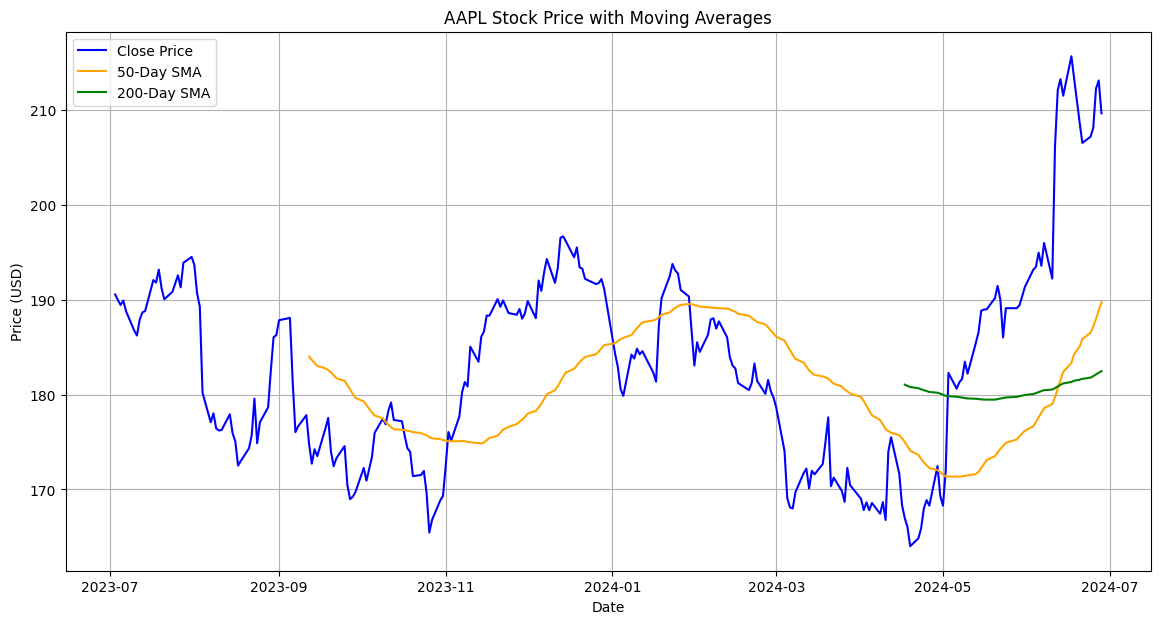

In [6]:
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['SMA_50'], label='50-Day SMA', color='orange')
plt.plot(data['SMA_200'], label='200-Day SMA', color='green')
plt.title(f'{ticker} Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


In [7]:
fig = go.Figure()

# Candlestick chart
fig.add_trace(go.Candlestick(x=data.index,
                open=data['Open'], high=data['High'],
                low=data['Low'], close=data['Close'],
                name='Price'))

# Add Moving Averages
fig.add_trace(go.Scatter(x=data.index, y=data['SMA_50'], mode='lines', name='50-Day SMA', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=data.index, y=data['SMA_200'], mode='lines', name='200-Day SMA', line=dict(color='green')))

# Add volume as bar chart
fig.add_trace(go.Bar(x=data.index, y=data['Volume'], name='Volume', yaxis='y2', marker_color='lightblue'))

# Layout
fig.update_layout(
    title=f'{ticker} Stock Price with Moving Averages & Volume',
    yaxis_title='Stock Price (USD)',
    yaxis2=dict(title='Volume', overlaying='y', side='right', showgrid=False),
    xaxis_rangeslider_visible=False,
    height=600
)

fig.show()


In [8]:
# Calculate 20-day Bollinger Bands
data['MA20'] = data['Close'].rolling(window=20).mean()
data['STD20'] = data['Close'].rolling(window=20).std()
data['UpperBand'] = data['MA20'] + (2 * data['STD20'])
data['LowerBand'] = data['MA20'] - (2 * data['STD20'])


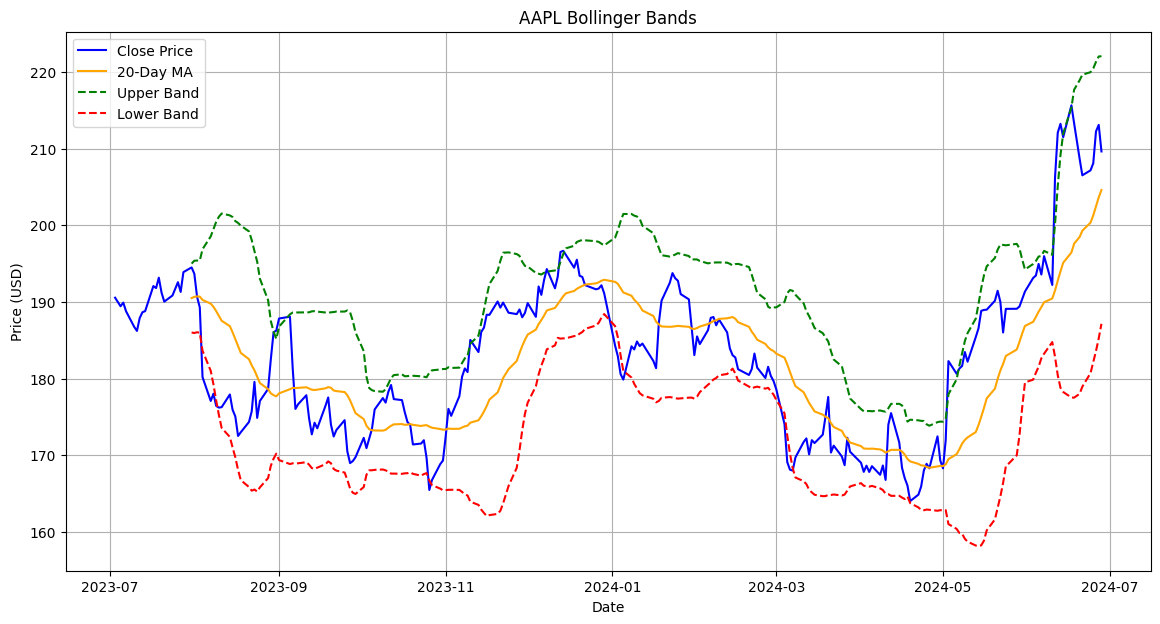

In [9]:
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['MA20'], label='20-Day MA', color='orange')
plt.plot(data['UpperBand'], label='Upper Band', color='green', linestyle='--')
plt.plot(data['LowerBand'], label='Lower Band', color='red', linestyle='--')
plt.title(f'{ticker} Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


In [10]:
# Function to calculate RSI
def calculate_rsi(series, period=14):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data['Close'])


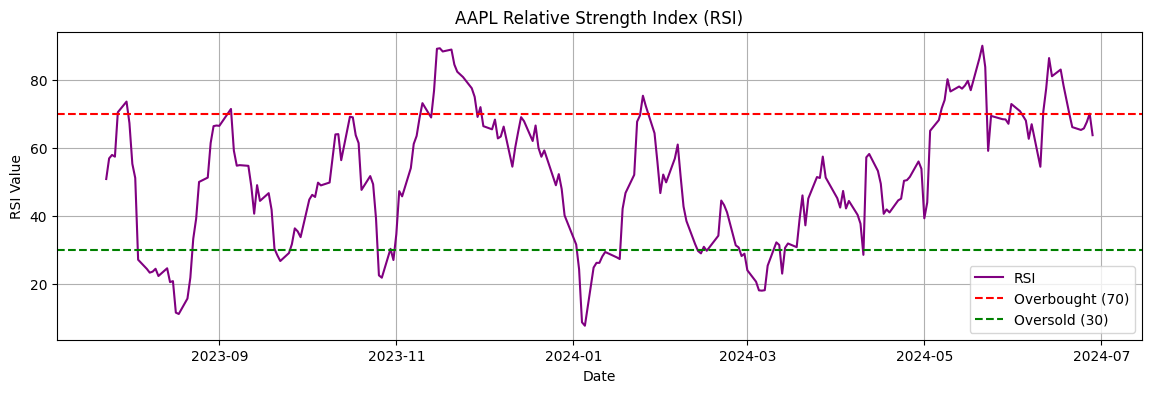

In [11]:
plt.figure(figsize=(14, 4))
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title(f'{ticker} Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.grid()
plt.show()
